## `Essential Functions`

In [ ]:
import matplotlib.pyplot as plt
# _____________________________________________________________________________________________________
# Function to plot a grayscale image
def plot_image(image):
    """
    Args: image (numpy.ndarray): The input image array.
    """
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
# _____________________________________________________________________________________________________
# Function to plot a color image
def plot_color_image(image):
    """
    Args: image (numpy.ndarray): The input color image array.
    """
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
# _____________________________________________________________________________________________________
# Function to save the current figure.
import os # Importing the os module for operating system related functions
# Define the directory structure for saving figures
PROJECT_ROOT_DIR = "." # Define the project's root directory
CHAPTER_ID = "cnn" # Define the chapter ID (or directory name) for organization
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # Define the path where images will be saved by joining the project root, "images", and chapter ID
os.makedirs(IMAGES_PATH, exist_ok=True)# Create the directory specified by IMAGES_PATH if it doesn't already exist

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Args:
    1. fig_id (str): The filename (without extension) to save the figure as.
    2. tight_layout (bool, optional): Whether to apply tight layout. Default is True.
    3. fig_extension (str, optional): The file extension of the saved figure. Default is "png".
    4. resolution (int, optional): The resolution of the saved figure. Default is 300.
    """
    # Construct the full path for saving the figure
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    # Inform about the saving process
    print("Saving figure", fig_id)
    # Apply tight layout if specified
    if tight_layout:
        plt.tight_layout()
    # Save the figure with specified format and resolution
    plt.savefig(path, format=fig_extension, dpi=resolution)
# _____________________________________________________________________________________________________
# Function to crop a portion of the input images.
def crop(images):
    """
    Args: images (numpy.ndarray): The input image array.
    Returns: numpy.ndarray: The cropped portion of the input images.
    """
    return images[150:220, 130:250]

# `Convolutional Layers`

The convolutional layer is the key component of a CNN. 

* Unlike first layer, neurons in the first convolutional layer are connected only to `pixels` within their `receptive fields`, not to every pixel in the input image. Neurons in subsequent layers are connected to a `small rectangle` of neurons in the preceding layer. 

* This `hierarchical architecture` enables the network to focus on `small low-level features` initially, gradually `assembling` them into larger `higher-level features` in subsequent layers. 

* This hierarchical structure mirrors real-world images, making CNNs highly effective for image recognition.

In [ ]:
'''
   Input Image         Convolutional Layer 1        Convolutional Layer 2
+-------------+           +-------------+             +-------------+
|             |           |             |             |             |
|   Neurons   |           |   Neurons   |             |   Neurons   |
|   connected |           |   connected |             |   connected |
|     to      |           |     to      |             |     to      |
|   pixels    |           |   small     |             |   small     |
|     in      |           |  rectangle  |             |  rectangle  |
| receptive   |           | in previous |             | in previous |
|   fields    |           |    layer    |             |    layer    |
|             |           |             |             |             |
+-------------+           +-------------+             +-------------+
'''

'\n   Input Image         Convolutional Layer 1        Convolutional Layer 2\n+-------------+           +-------------+             +-------------+\n|             |           |             |             |             |\n|   Neurons   |           |   Neurons   |             |   Neurons   |\n|   connected |           |   connected |             |   connected |\n|     to      |           |     to      |             |     to      |\n|   pixels    |           |   small     |             |   small     |\n|     in      |           |  rectangle  |             |  rectangle  |\n| receptive   |           | in previous |             | in previous |\n|   fields    |           |    layer    |             |    layer    |\n|             |           |             |             |             |\n+-------------+           +-------------+             +-------------+\n'

  * **Zero Padding:** A neuron positioned at row $i$, column $j$ within a specific layer receives inputs from neurons in the previous layer situated in rows $i$ to $i + f_h – 1$, and columns $j$ to $j + f_w – 1$. Here, $f$ represents the height and width of the receptive field. To maintain `consistency in layer dimensions` with the preceding layer, it's typical to append zeros around the inputs, as depicted in the diagram. This practice is commonly referred to as `zero padding`

In [ ]:
'''
Neurons in Layer (i, j):        
+---+---+---+
|   |   |   |    
+---+---+---+
|   |   |   |    
+---+---+---+
|   |   |   |    
+---+---+---+

Layer (i, j) with Padding:
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
'''

'\nNeurons in Layer (i, j):        \n+---+---+---+\n|   |   |   |    \n+---+---+---+\n|   |   |   |    \n+---+---+---+\n|   |   |   |    \n+---+---+---+\n\nLayer (i, j) with Padding:\n+---+---+---+---+---+\n| 0 | 0 | 0 | 0 | 0 |\n+---+---+---+---+---+\n| 0 |   |   |   | 0 |\n+---+---+---+---+---+\n| 0 |   |   |   | 0 |\n+---+---+---+---+---+\n| 0 |   |   |   | 0 |\n+---+---+---+---+---+\n| 0 | 0 | 0 | 0 | 0 |\n+---+---+---+---+---+\n'

* **Note:** It is also possible to connect a large input layer to a much smaller layer by `spacing out` the receptive fields.

  * This dramatically reduces the model’s computational complexity. 

  * The shift from one receptive field to the next is called the **stride**. 

  * In the diagram, a $5 × 7$ `input layer` (plus zero padding) is connected to a $3 × 4$ `layer`, using 3 × 3 `receptive fields` and a `stride of 2` (in this example the **stride** is the same in both directions, but it does not have to be so). 

  * A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i × s_h$ to $i × s_h + f_h – 1$, columns $j × s_w$ to $j × s_w + f_w – 1$, where $s_w$ and $s_h$ are the vertical and horizontal strides.

In [ ]:
'''
Previous Layer (5x7):
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
| | |  | | | | |
+-+-+--+-+-+-+-+
| | |  | | | | |
+-+-+--+-+-+-+-+

Upper Layer (3x4):
+-+-+-+-+-+-+
|*|#| | | | |
+-+-+-+-+-+-+
| | | | | | |
+-+-+-+-+-+-+
| | | | | | |
+-+-+-+-+-+-+
'''

'\nPrevious Layer (5x7):\n+-+-+--+-+-+-+-+\n|*|*|*#|#|#| | |\n+-+-+--+-+-+-+-+\n|*|*|*#|#|#| | |\n+-+-+--+-+-+-+-+\n|*|*|*#|#|#| | |\n+-+-+--+-+-+-+-+\n| | |  | | | | |\n+-+-+--+-+-+-+-+\n| | |  | | | | |\n+-+-+--+-+-+-+-+\n\nUpper Layer (3x4):\n+-+-+-+-+-+-+\n|*|#| | | | |\n+-+-+-+-+-+-+\n| | | | | | |\n+-+-+-+-+-+-+\n| | | | | | |\n+-+-+-+-+-+-+\n'

## Filters (Convolution Kernels): 

Each filter focuses on detecting specific patterns in the input data, such as vertical or horizontal lines. By convolving these filters over the input image, the CNN can identify important features.

  * During training, the CNN learns to adjust the weights of these filters automatically to optimize performance for the given task. As a result, the network can learn to recognize complex patterns and features in the input data, leading to more accurate predictions.

  * **Feature Extraction**: Filters are used to extract meaningful features from input data. These features represent patterns or characteristics present in the data that are relevant to the task at hand. For example, in image classification tasks, filters might detect edges, textures, shapes, or other visual patterns.

  * **Dimensionality Reduction**: By applying filters to input data, CNNs can reduce the dimensionality of the data while preserving important information. This reduction in dimensionality helps in focusing on the most relevant features, making the subsequent processing more efficient.

* **Convolution Operation**: Mathematical Explanation

  * The convolution operation is a fundamental process in image processing and forms the basis of operations in convolutional neural networks ($CNNs$). Mathematically, the convolution between a 2D input image ($ I $) and a 2D filter ( $F$ ) at a specific position can be expressed as:

    $ O(i, j) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} I(i-m, j-n) \cdot F(m, n) $

     - $O(i, j) $ represents the output value at position $(i, j)$ in the resulting feature map.
     - $M$ and $N$ are the dimensions of the filter $F$.
     - $I(i-m, j-n)$ denotes the pixel intensity of the input image at position $(i-m, j-n)$.
     - $F(m, n)$ represents the weight of the filter at position $(m, n)$.

  * This equation computes the dot product between the input image patch centered at position $(i, j)$ and the filter $ F$. It then sums up these products over all the elements of the filter to produce the output value $ O(i, j) $ at the corresponding position in the output feature map.

  * The convolution operation is applied across all positions $ (i, j) $ in the input image, resulting in a new feature map $ O $ that captures certain characteristics or features of the input image, as influenced by the filter $ F $.

  * The filter $ F $ may undergo operations such as weight sharing and bias addition during the convolution process within neural network architectures like CNNs.



* **Simple example:** where we have a grayscale image and we want to apply filters to detect horizontal and vertical edges.

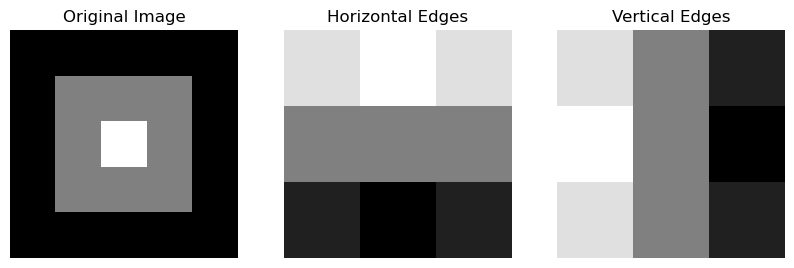

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Example grayscale image
image = np.array([[10, 10, 10, 10, 10],
                  [10, 20, 20, 20, 10],
                  [10, 20, 30, 20, 10],
                  [10, 20, 20, 20, 10],
                  [10, 10, 10, 10, 10]])

# Define horizontal and vertical edge detection filters
horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])

vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

# Convolve filters with the image
horizontal_edges = convolve2d(image, horizontal_filter, mode='valid')
vertical_edges = convolve2d(image, vertical_filter, mode='valid')

# Plot the original image and the detected edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.show()

* **Example:** 
* The initial filter is depicted as a black square containing a white vertical line at its center, essentially comprising a 7x7 matrix predominantly filled with zeros except for the central column, which is entirely occupied by ones. Neurons employing these weights will exclusively focus on the central vertical line within their receptive field, as inputs outside this line will be nullified due to multiplication by zero. 

* Similarly, the second filter resembles a black square featuring a white horizontal line at its midpoint. Neurons utilizing these weights will solely attend to the central horizontal line within their receptive field, disregarding other inputs.

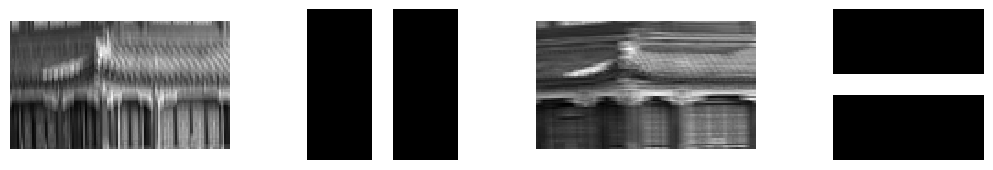

In [ ]:
import numpy as np  # Importing NumPy library as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image  # Importing load_sample_image function from sklearn.datasets module

# Load sample images
''' Dividing images by 255 scales the pixel values to a range between 0 and 1. 
This normalization simplifies computation and ensures consistency across different 
datasets by standardizing pixel values, regardless of the original color depth. 
It's a common practice in image processing and machine learning to facilitate 
convergence during training and improve model performance.'''
china = load_sample_image("china.jpg") / 255  # Loading and normalizing the "china.jpg" image
flower = load_sample_image("flower.jpg") / 255  # Loading and normalizing the "flower.jpg" image
images = np.array([china, flower])  # Creating an array containing both images
''''
batch_size: This refers to the number of images in the dataset. 
height: It indicates the vertical size of the images in pixels, representing the number of rows.
width: It represents the horizontal size of the images in pixels, denoting the number of columns.
channels: It represent the image depth, indicating whether it's grayscale or colored. Grayscale images have one channel, while RGB images have three.'''
batch_size, height, width, channels = images.shape  # Retrieving dimensions of the images

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)  # Creating an array of zeros for filters with specified shape
filters[:, 3, :, 0] = 1  # Defining the first filter as a vertical line
filters[3, :, :, 1] = 1  # Defining the second filter as a horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")  # Performing convolution operation on the images using the defined filters
'''
tf.nn.conv2d: It's a TensorFlow function for 2D convolution, a core operation in CNNs where a filter is applied to an image to generate a feature map.
images: This is the input to the convolution operation. It is typically a tensor representing an image or a batch of images. 
filters: This represents the convolutional filters or kernels. These are smaller tensors applied to the input image to perform convolution. 
strides: This parameter specifies the stride of the convolution. It's an integer or a tuple of two integers, indicating the horizontal and vertical stride respectively. 
padding: This parameter controls how the convolution handles image borders. "SAME" padding ensures the output feature map matches the input image's dimensions by padding zeros around it.'''

# Create a figure with a specific size
plt.figure(figsize=(13, 9))

# Iterate over a range of values from 0 to 4 (exclusive) with a step of 2
for image_index in range(0, 4, 2):
    # Create a subplot in a 4x4 grid, index starts from 1
    plt.subplot(4, 4, image_index+1)
    # Plot the cropped image corresponding to the current index
    plot_image(crop(outputs[0, :, :, round(image_index/2)]))
    # Create another subplot in the same grid
    plt.subplot(4, 4, image_index+2)
    # Plot the filter image corresponding to the current index
    plot_image(filters[:, :, 0, round(image_index/2)])

## Stacking Multiple Feature Maps
* **Stacking Multiple Feature Maps**: Convolutional layers are indeed composed of multiple filters, each responsible for detecting different features in the input data. The **number** of **filters** in a convolutional layer is a **hyperparameter** set by the designer of the neural network.

  * During the forward pass, each filter simultaneously convolves with the input data, producing a **feature map**. These feature maps capture various patterns or features present in the input, such as edges, textures, or more complex structures, depending on the parameters of the filters and the nature of the data.

  * By having multiple filters, the convolutional layer can detect and extract diverse features simultaneously, enhancing the model's capability to learn complex representations from the input data. 

  * This parallel processing of multiple filters enables convolutional neural networks to excel in tasks such as image recognition, object detection, and semantic segmentation, among others.

* Images consist of **multiple sublayers** or **channels**, like the red, green, and blue (RGB) channels. Grayscale images have one channel, while others, like satellite images, may have more, such as infrared channels. These channels capture different aspects of the image's information.

* To visualize this description of a convolutional neural network (CNN), we need to understand how neurons in a convolutional layer are connected to neurons in the previous layer. 

  * **Neuron Position in the Current Layer (l):** We have a neuron located at position $(i, j)$ in feature map $k$ of layer $l$.
  * **Connection to Previous Layer (l-1):** This neuron in layer $l$ is connected to the outputs of neurons in the previous layer $l-1$, Specifically, it connects to neurons in rows $i × s$ to $i × s + f - 1$ and columns $j × s$ to $j × s + f - 1$, across all feature maps in layer $l-1$.
  * **Shared Connections Across Feature Maps:** Neurons in the row $i$ and column $j$ but in different feature maps (in the same layer $l$) are simultanusely connected to the outputs of the neurons located in rows $i × s$ to $i × s + f – 1$ and columns $j × s$ to $j × s + f – 1$, across all feature maps in the previous layer $l-1$.

In [ ]:
'''
Layer l:

FM1                    FM2
  0   0   0   0         0   0   0   0
  0   0   0   0         0   0   0   0
  0   0  (2,2) 0  ----> 0   0  (2,2) 0
  0   0   0   0         0   0   0   0
  0   0   0   0         0   0   0   0
      |   |   |             |   |   |
      V   V   V             V   V   V
Layer l-1:

FM1                    FM2
  0   0   0   0   0         0   0   0   0   0
  0   0   0   0   0         0   0   0   0   0
  0   0  [2,2] [2,3] [2,4]  0   0  [2,2] [2,3] [2,4]
  0   0  [3,2] [3,3] [3,4]  0   0  [3,2] [3,3] [3,4]
  0   0  [4,2] [4,3] [4,4]  0   0  [4,2] [4,3] [4,4]
  0   0   0   0   0         0   0   0   0   0
'''

'\nLayer l:\n\nFM1                    FM2\n  0   0   0   0         0   0   0   0\n  0   0   0   0         0   0   0   0\n  0   0  (2,2) 0  ----> 0   0  (2,2) 0\n  0   0   0   0         0   0   0   0\n  0   0   0   0         0   0   0   0\n      |   |   |             |   |   |\n      V   V   V             V   V   V\nLayer l-1:\n\nFM1                    FM2\n  0   0   0   0   0         0   0   0   0   0\n  0   0   0   0   0         0   0   0   0   0\n  0   0  [2,2] [2,3] [2,4]  0   0  [2,2] [2,3] [2,4]\n  0   0  [3,2] [3,3] [3,4]  0   0  [3,2] [3,3] [3,4]\n  0   0  [4,2] [4,3] [4,4]  0   0  [4,2] [4,3] [4,4]\n  0   0   0   0   0         0   0   0   0   0\n'

### Equation to compute the output of a given neuron in a convolutional layer:

* It calculate the weighted sum of all the inputs, plus the bias term.

\begin{equation}
z_{i,j,k} = b_k + \sum_{u=0}^{f_h-1} \sum_{v=0}^{f_w-1} \sum_{k'=0}^{f_n'-1} x_{i',j',k'} \cdot w_{u,v,k',k}
\end{equation}

where: $ i' = i \times s_h + u $, $ j' = j \times s_w + v $

In this equation:
*  $z_{i,j,k}$ is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer.
* $b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness of the feature map $k$.
* $f_h$ and $f_w$ are the height and width of the receptive field.
* $f_n'$ is the number of feature maps in the previous layer (layer $l-1$).
*  $s_h$ and $s_w$ are the vertical and horizontal strides.
* $x_{i',j',k'}$ is the output of the neuron located in layer $l-1$, row $i'$, column $j'$, feature map $k'$ (or channel $k'$ if the previous layer is the input layer).
* $w_{u,v,k',k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron’s receptive field), and feature map $k'$.

## TensorFlow Implementation

**1. Loading Sample Images**
* In TensorFlow, each input *image* is typically represented as a *3D tensor* of shape *[height, width, channels]*. 
* A *mini-batch* is represented as a *4D tensor* of shape *[mini-batch size, height, width, channels]*. 
* The *weights* of a convolutional layer are represented as a *4D tensor* of shape *[filter height, filter width, input channels, output channels]*. The *bias* terms of a convolutional layer are simply represented as a *1D tensor* of shape *[output channels]*.

**2. Performing 2D convolution on tensors (`tf.nn.conv2d()`)**

* **Images** represent the input mini-batch, structured as a 4D tensor. 

* **Filters** denote the set of filters to apply, also organized as a 4D tensor as previously outlined. 

* **Strides** are typically set to 1, but alternatively, it could be represented by a 1D array with four elements. The two central elements signify the vertical and horizontal strides ($s_w$ and $s_h$). 

* **Padding** must be designated as either **same** or **valid**:

    * When set to **same** the convolutional layer incorporates zero padding when necessary. The output size is adjusted to the number of input neurons divided by the stride, rounded up. For instance, if the input size is 13 and the stride is 5, then the output size is 3 (i.e., 13 / 5 = 2.6, rounded up to 3). Zeros are then evenly added around the inputs as required. In cases where strides=1, the layer’s outputs maintain identical spatial dimensions (width and height) as its inputs, hence the term "same."
    
    * When using **valid** padding, the convolutional layer ignores adding any extra padding around the input image. Instead, it might skip some rows and columns at the edges of the input image, depending on the specified stride. This guarantees that each neuron's receptive field stays entirely within the valid positions inside the input, hence the term **valid**.

**3. Plotting one of the resulting feature maps**


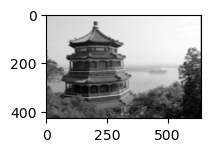

In [ ]:
from sklearn.datasets import load_sample_image  # Import function to load sample images
import numpy as np  # Import NumPy library for array manipulation
import tensorflow as tf  # Import TensorFlow library for deep learning operations
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Load sample images and normalize pixel values to the range [0, 1]
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

# Combine images into a batch
images = np.array([china, flower])

# Get dimensions of the batch
batch_size, height, width, channels = images.shape

# Create 2 filters: one for detecting vertical lines and one for horizontal lines
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # Set values for vertical line filter
filters[3, :, :, 1] = 1  # Set values for horizontal line filter

# Perform convolution operation on the images with the filters
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

# Plot the 1st image's 2nd feature map
plt.figure(figsize=(2, 1.5))
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

**4. Creatign a 2D convolutional layer, using `keras.layers.Conv2D()`:**

In [ ]:
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf

# Importing necessary libraries for TensorFlow and NumPy

# Setting random seeds to ensure reproducibility of results
np.random.seed(42)  # Setting seed for NumPy random number generator
tf.random.set_seed(42)  # Setting seed for TensorFlow random number generator

'''
Defining a convolutional layer

A convolution operation is applied to the input, typically used for feature extraction
Here, we're creating a 2D convolutional layer with 2 filters, a kernel size of 7x7, and ReLU activation
"strides=1" means the filter in each step, one pixel to the right (along the width) 
 and one pixel down (along the height), covering all possible positions in the input image. 
"padding='SAME'" pads the input such that the output has the same height and width as the input
"input_shape=outputs.shape" defines the shape of the input to the layer, where 'outputs' is assumed to be predefined
'''

conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1,
                           padding="SAME", activation="relu", input_shape=outputs.shape)


## Memory Usage
- **Understanding the Layer's Configuration**
  - **Filter Size**: The layer uses filters (kernels) of size $5 \times 5$.
  - **Number of Filters**: There are 200 filters, each producing a feature map.
  - **Feature Map Size**: The output feature maps are of size $150 \times 100$.
  - **Stride and Padding**:
    - **Stride**: The stride is 1, meaning the filter moves one pixel at a time.
    - **Padding**: "Same" padding means the output feature map has the same spatial dimensions as the input.

- **Input Characteristics**
  - **Input Size**: The input is a $150 \times 100$ RGB image, which means it has three channels (Red, Green, Blue).

- **Calculating the Number of Parameters**
  - **Weights**: Each filter has a size of $5 \times 5$ and is applied to 3 channels. Thus, each filter has $5 \times 5 \times 3 = 75$ weights.
  - **Bias**: Each filter also has one bias term.

  So, the total number of parameters per filter is: $75 + 1 = 76 $. With 200 filters, the total number of parameters is: $76 \times 200 = 15,200$

- **Computational Complexity**
  - Each neuron considers a $5 \times 5 \times 3$ region from the input, totaling 75 inputs.
  - Each feature map has $150 \times 100$ neurons.

  So, the total number of multiplications for all feature maps is: $200 \times 150 \times 100 \times 75 = 225,000,000 \text{ multiplications} $

- **Memory Usage**
  - Each feature map has $150 \times 100$ neurons.
  - There are 200 feature maps.
  - If represented using 32-bit floats, each value occupies 4 bytes (since 1 byte = 8 bits, and 32 bits = 4 bytes).

  The memory required for the output of one instance is: $200 \times 150 \times 100 \times 4 \text{ bytes} = 12,000,000 \text{ bytes} = 12 \text{ MB}$. For a training batch of 100 instances: $ 12 \text{ MB} \times 100 = 1,200 \text{ MB} = 1.2 \text{ GB} $

- **Summary**
  - **Memory Usage**: The output of the layer for one instance occupies 12 MB of RAM, and for a batch of 100 instances, it occupies 1.2 GB of RAM.

- **The difference in memory requirement between inference and training**

  * During inference, memory occupied by one layer can be released once the next layer's computation is complete, requiring only enough RAM for two consecutive layers. 
  * In contrast, during training, all computations done during the forward pass must be preserved for the backward pass, necessitating enough RAM to store all intermediate values, gradients, and parameters for each layer throughout the network. 
  * This difference underscores the need to optimize memory usage during training to avoid memory constraints.

In [ ]:
'''
This function helps quantify the computational and memory requirements of 
a convolutional layer in a CNN, aiding in optimizing network architecture 
and resource allocation.
'''
def calculate_memory_usage(input_shape, filter_size, num_filters, stride, padding, batch_size, data_type='float32'):
    # Unpacking input shape dimensions
    input_height, input_width, input_channels = input_shape
    
    # Unpacking filter dimensions
    filter_height, filter_width = filter_size
    
    # Data type size mapping (in bytes)
    data_type_size = {
        'float32': 4,
        'float64': 8
    }
    
    # Validate the provided data type
    if data_type not in data_type_size:
        raise ValueError("Unsupported data type. Use 'float32' or 'float64'.")
    
    # Calculate output dimensions based on padding type
    if padding == 'same':
        output_height = input_height
        output_width = input_width
    elif padding == 'valid':
        output_height = (input_height - filter_height) // stride + 1
        output_width = (input_width - filter_width) // stride + 1
    else:
        raise ValueError("Unsupported padding type. Use 'same' or 'valid'.")
    
    # Calculate the number of parameters per filter
    num_weights_per_filter = filter_height * filter_width * input_channels
    num_params_per_filter = num_weights_per_filter + 1  # Adding 1 for the bias term
    total_params = num_params_per_filter * num_filters
    
    # Calculate computational complexity
    num_multiplications_per_neuron = num_weights_per_filter
    num_neurons_per_feature_map = output_height * output_width
    total_multiplications = num_filters * num_neurons_per_feature_map * num_multiplications_per_neuron
    
    # Determine if the operation is computationally intensive
    computationally_intensive_threshold = 100_000_000  # Threshold set to 100 million multiplications
    is_computationally_intensive = total_multiplications > computationally_intensive_threshold
    
    # Calculate memory usage for the output feature maps
    output_volume = output_height * output_width * num_filters
    memory_usage_per_instance = output_volume * data_type_size[data_type]
    
    # Calculate total memory usage for the batch
    total_memory_usage = memory_usage_per_instance * batch_size
    
    # Return a dictionary with the calculated values
    return {
        'total_params': total_params,
        'total_multiplications': total_multiplications,
        'is_computationally_intensive': is_computationally_intensive,
        'memory_usage_per_instance_MB': memory_usage_per_instance / (1024 * 1024),  # Convert to MB
        'total_memory_usage_GB': total_memory_usage / (1024 * 1024 * 1024)  # Convert to GB
    }

# Example usage of the function
input_shape = (150, 100, 3)  # Input dimensions: height, width, channels
filter_size = (5, 5)         # Filter dimensions: height, width
num_filters = 200            # Number of filters
stride = 1                   # Stride length
padding = 'same'             # Padding type
batch_size = 100             # Batch size
data_type = 'float32'        # Data type of the weights and biases

# Call the function with the provided parameters
memory_usage_info = calculate_memory_usage(input_shape, filter_size, num_filters, stride, padding, batch_size, data_type)

# Print the results
print(f"Total parameters: {memory_usage_info['total_params']}")
print(f"Total multiplications: {memory_usage_info['total_multiplications']}")
print(f"Is computationally intensive: {memory_usage_info['is_computationally_intensive']}")
print(f"Memory usage per instance: {memory_usage_info['memory_usage_per_instance_MB']:.2f} MB")
print(f"Total memory usage for batch: {memory_usage_info['total_memory_usage_GB']:.2f} GB")

Total parameters: 15200
Total multiplications: 225000000
Is computationally intensive: True
Memory usage per instance: 11.44 MB
Total memory usage for batch: 1.12 GB


# `Pooling layer`

* Pooling layers in **CNNs** **reduce image size**, **cutting computational complexity**, **memory usage**, and **overfitting**.

* They **aggregate inputs** using functions like **max pooling**, which **passes** only the **maximum value** from each **receptive field** to the next layer.

* Pooling layers, unlike convolutional layers, don't have weights and rely on parameters such as size, stride, and padding to determine output dimensions.

* For example, a $2$ x $2$ max pooling kernel with a stride of 2 and no padding halves the input image's height and width.

In [ ]:
'''
Input Image (4x4)               After 2x2 Max Pooling (2x2)
-----------------               ---------------------------
| 1 | 3 | 2 | 4 |               | 3 | 4 |
|---|---|---|---|               |---|---|
| 5 | 6 | 1 | 2 |     ---->     | 6 | 8 |
|---|---|---|---|
| 9 | 8 | 7 | 4 |
|---|---|---|---|
| 2 | 3 | 6 | 5 |
-----------------

Max Pooling Kernel (2x2, stride 2):
- Selects the maximum value from each 2x2 region
- No padding applied
'''

'\nInput Image (4x4)               After 2x2 Max Pooling (2x2)\n-----------------               ---------------------------\n| 1 | 3 | 2 | 4 |               | 3 | 4 |\n|---|---|---|---|               |---|---|\n| 5 | 6 | 1 | 2 |     ---->     | 6 | 8 |\n|---|---|---|---|\n| 9 | 8 | 7 | 4 |\n|---|---|---|---|\n| 2 | 3 | 6 | 5 |\n-----------------\n\nMax Pooling Kernel (2x2, stride 2):\n- Selects the maximum value from each 2x2 region\n- No padding applied\n'

### Translation Invariance

* It also play a crucial role in **enhancing** the **model's robustness** by introducing **invariance** to certain **transformations**, particularly small translations.

### Rotational and Scale Invariance

* **Rotational Invariance:** A small rotation of the input image will often still result in the maximum values being located within the same pooling windows, thus providing some resistance to changes in orientation.

* **Scale Invariance:** While max pooling is **not fully** scale-invariant, it can handle **minor** changes in scale by focusing on the most prominent features (the maximum values) within each window, regardless of slight size variations.

* By using max pooling, a CNN gains a level of translation invariance that helps in recognizing patterns even if they are slightly shifted. This property enhances the robustness of the model for tasks like image classification, where exact positioning of features is less important than their presence and relative prominence.


In [ ]:
'''
Image A:

  1 |  2 |  3 |  4 |      |  6 |  8 |
  5 |  6 |  7 |  8 | ->   | 14 | 16 |
  9 | 10 | 11 | 12 |
 13 | 14 | 15 | 16 |

Image B:

  4 |  1 |  2 |  3 |     |  8 |  7 |
  8 |  5 |  6 |  7 | ->  | 16 | 15 |
 12 |  9 | 10 | 11 |
 16 | 13 | 14 | 15 |

Image C:

  3 |  4 |  1 |  2 |     |  8 |  6 |
  7 |  8 |  5 |  6 | ->  | 16 | 14 |
 11 | 12 |  9 | 10 |
 15 | 16 | 13 | 14 |
'''

'\nImage A:\n\n  1 |  2 |  3 |  4 |      |  6 |  8 |\n  5 |  6 |  7 |  8 | ->   | 14 | 16 |\n  9 | 10 | 11 | 12 |\n 13 | 14 | 15 | 16 |\n\nImage B:\n\n  4 |  1 |  2 |  3 |     |  8 |  7 |\n  8 |  5 |  6 |  7 | ->  | 16 | 15 |\n 12 |  9 | 10 | 11 |\n 16 | 13 | 14 | 15 |\n\nImage C:\n\n  3 |  4 |  1 |  2 |     |  8 |  6 |\n  7 |  8 |  5 |  6 | ->  | 16 | 14 |\n 11 | 12 |  9 | 10 |\n 15 | 16 | 13 | 14 |\n'

### Downsides of Max Pooling

#### Destructive Nature:

* Max pooling significantly reduces the size of the feature map. Specifically, with a $2$ x $2$ kernel and a stride of $2$, the output is four times smaller in area compared to the input. Essentially, $75$% of the input values are discarded, retaining only the maximum values in each $2$ x $2$ block.

#### Loss of Detailed Information:

* By focusing only on the maximum values, max pooling can discard important details that could be valuable for certain tasks. This can lead to a loss of spatial information that might be critical in some applications.

#### Why Invariance is Not Always Desirable:
* In applications like semantic segmentation, where precise pixel-level classification is required, invariance can be a disadvantage. Max pooling, by making the output less sensitive to small shifts in the input, can blur or misalign the detailed spatial information necessary for accurate pixel classification.
  * Goal of Equivariance: In these cases, we want the model to exhibit equivariance so that the output directly corresponds to changes in the input, preserving the spatial integrity of the features.


**Summary:** While max pooling is beneficial for reducing computations and providing some level of translation invariance, it is also quite destructive, significantly reducing the input size and potentially discarding valuable information. Additionally, in tasks like semantic segmentation, where spatial precision is crucial, the invariance property of max pooling is not desirable. Instead, we need equivariance, where outputs change in direct response to changes in inputs, ensuring accurate spatial mapping.

**Invariance:** Invariance means that the output remains largely unaffected by small changes in the input. 

**Equivariance:** Equivariance means that a small change in the input should result in a correspondingly small change in the output. This is crucial in applications where the precise location of features matters.

## TensorFlow Implementation (Max Pooling)

In [ ]:
import tensorflow.keras as keras

# Create a MaxPooling layer with pool size 2x2
max_pool = keras.layers.MaxPool2D(pool_size=2)

Saving figure china_max_pooling


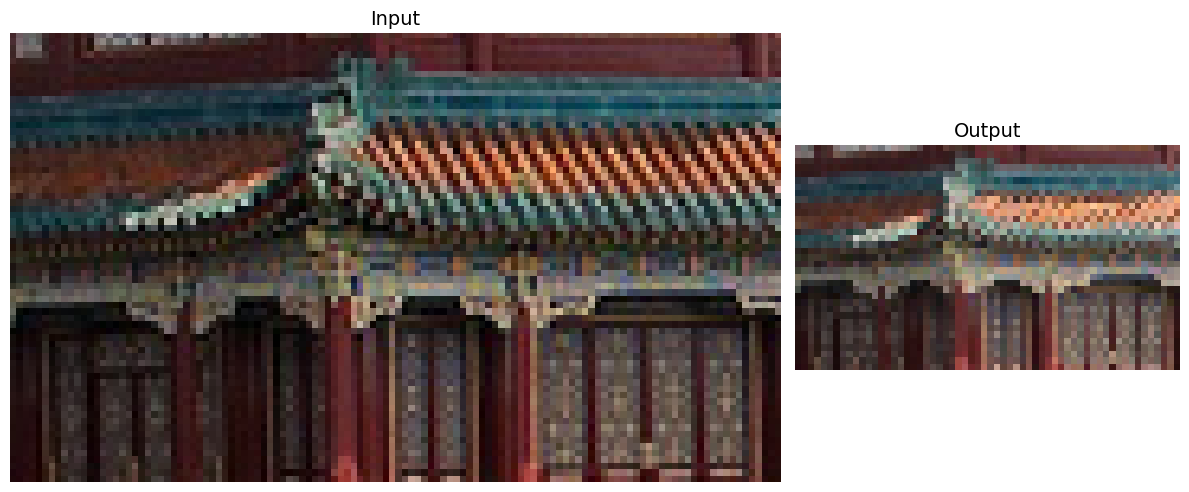

In [ ]:
import matplotlib as mpl  # Import matplotlib library for plotting

# Create a MaxPooling layer with pool size 2x2
max_pool = keras.layers.MaxPool2D(pool_size=2)  
# Crop images and convert to numpy array
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
# Apply max pooling to the cropped images
output = max_pool(cropped_images) 

# Create a figure for plotting
fig = plt.figure(figsize=(12, 8)) 
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1]) # Define grid specification for subplots
ax1 = fig.add_subplot(gs[0, 0]) # Add subplot for the input image
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")

# Add subplot for the output image after max pooling
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")

# Save and display the figure
save_fig("china_max_pooling")
plt.show()


## Depth-wise pooling

- Depthwise pooling refers to applying pooling operations along the depth (or channel) dimension of the input tensor, rather than the spatial dimensions (height and width). 
    - In standard pooling operations like max pooling or average pooling, the pooling is performed over a small region in the spatial dimensions, reducing the height and width of the input while keeping the number of channels the same. 
    - In contrast, depthwise pooling operates across the channels of the input tensor. Here's what this means in practice:

**Max Pooling (Depthwise):** For each spatial position (x, y) in the input, take the maximum value across all channels at that position.

**Average Pooling (Depthwise):** For each spatial position (x, y) in the input, compute the average value across all channels at that position.

- This type of pooling can help the CNN learn to be invariant to variations detected by different channels. For example:

    - **Rotation Invariance:** By learning filters that detect different rotations of the same pattern, depthwise max pooling can ensure the output remains consistent regardless of the input's rotation.

        - **For example,** if one filter detects vertical edges and another detects horizontal edges, depthwise max pooling ensures that the strongest edge (regardless of orientation) is preserved in the output.

    - **Other Invariances:** Depthwise pooling can also help achieve invariance to features such as thickness, brightness, skew, and color, depending on what the different channels represent.

- This technique is less common than spatial pooling but can be useful in specific scenarios where invariance to channel-specific features is desired.

## TensorFlow Implementation (Depth-wise pooling)

**Keras lacks** a **depthwise** max pooling layer, yet **TensorFlow's foundational** Deep Learning API offers one.

- The `tf.nn.max_pool` function is used, with the kernel size and strides specified as 4-tuples. 

    - The first three values (for batch, height, and width) are set to 1, meaning no pooling occurs along these dimensions. 

    - The fourth value is set to `pool_size`, which defines the pooling window along the depth dimension.

**Note :** In max pooling, typically the **kernel size** (ksize) and **stride** should be the **same**. This means that the pooling window moves with the same step size in all dimensions. This ensures that there is no overlap between adjacent pooling windows.

In [ ]:
import tensorflow as tf

# Create a sample input tensor with shape [batch_size, height, width, channels]
input_tensor = tf.constant([
    [
        [[1.0, 2.0, 3.0, 3.0], [4.0, 5.0, 6.0, 3.0]],   # Original input
        [[7.0, 8.0, 9.0, 3.0], [10.0, 11.0, 12.0, 3.0]],   # Original input
        [[13.0, 14.0, 15.0, 3.0], [16.0, 17.0, 18.0, 3.0]]   # Extend the depth to be divisible by 4
    ]
], dtype=tf.float32)

# Perform max pooling using tf.nn.max_pool with a depth window size of 4
pooled_tensor = tf.nn.max_pool(
    input_tensor,            # Input tensor
    ksize=(1, 1, 1, 4),      # Pooling window size (1 batch, 1x1 spatial dimensions, 4 channels) (This must be a divisor of the input channels)
    strides=(1, 1, 1, 4),    # Stride size (1 batch, 1x1 spatial dimensions, 4 channels)
    padding="VALID"          # Padding type ("VALID" or "SAME")
)

# Print the original and pooled tensors
print("Original Tensor:")
print(input_tensor)
print("\nPooled Tensor:")
print(pooled_tensor)


Original Tensor:
tf.Tensor(
[[[[ 1.  2.  3.  3.]
   [ 4.  5.  6.  3.]]

  [[ 7.  8.  9.  3.]
   [10. 11. 12.  3.]]

  [[13. 14. 15.  3.]
   [16. 17. 18.  3.]]]], shape=(1, 3, 2, 4), dtype=float32)

Pooled Tensor:
tf.Tensor(
[[[[ 3.]
   [ 6.]]

  [[ 9.]
   [12.]]

  [[15.]
   [18.]]]], shape=(1, 3, 2, 1), dtype=float32)


**To integrate `tf.nn.max_pool` into your `Keras models`, you have two options:** 
1. **Creating a custom Keras layer** to include it.

depth_output =  (2, 70, 120, 1)
cropped_images (2, 70, 120, 3)


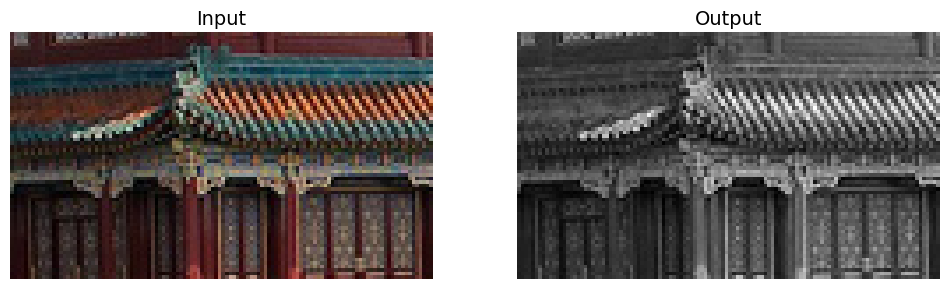

In [ ]:
'''
This class defines a custom Keras layer called DepthMaxPool, 
which performs max pooling specifically along the depth dimension
(channels) of a 4D input tensor. 
'''

# Import necessary modules from Keras and TensorFlow
from keras.models import Sequential
from keras.layers import Input, Conv2D, Layer
import numpy as np

# Define a custom Keras layer for DepthMaxPool
class DepthMaxPool(Layer):
    # Initialize the DepthMaxPool layer with specified parameters
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        # Call the superclass constructor to initialize base Keras layer
        super().__init__(**kwargs)
        # If strides are not provided, default them to the pool size
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size  # Size of the pooling window
        self.strides = strides      # Stride of the pooling operation
        self.padding = padding      # Padding type ('VALID' or 'SAME')

    # Define the computation performed by the layer when called
    def call(self, inputs):
        # Apply max pooling on the input tensor
        # ksize and strides are set to pool across the depth dimension
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),    # Pooling window size
                              strides=(1, 1, 1, self.pool_size),  # Stride size
                              padding=self.padding)               # Padding type


# Create a DepthMaxPool layer with a pool size of 3
depth_pool = DepthMaxPool(3)

# Use CPU for computation since there is no GPU kernel yet
with tf.device("/cpu:0"):
    # Apply the DepthMaxPool layer to the cropped_images tensor
    depth_output = depth_pool(cropped_images)

# Print the shape of the depth_output tensor
print('depth_output = ',depth_output.shape)
# Print the shape of the cropped_images tensor
print('cropped_images', cropped_images.shape)

# Create a figure with a size of 12x8 inches
plt.figure(figsize=(12, 8))
# Add the first subplot for the input image
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plot_color_image(cropped_images[0])  # plot the 1st image
# Add the second subplot for the output image
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plot_image(depth_output[0, ..., 0])  # plot the output for the 1st image
# Turn off axis for the plot
plt.axis("off")
# Display the plot
plt.show()

2. **Using a `Lambda` layer** to include it.

In [ ]:
# Define a Lambda layer to perform max pooling along the depth dimension
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))

with tf.device("/cpu:0"):  # Execute the operation on CPU (no GPU kernel yet)
    # Apply the max pooling operation to the input tensor
    depth_output = depth_pool(cropped_images)

# Print the shape of the depth_output tensor
depth_output.shape


TensorShape([2, 70, 120, 1])

### Average Pooling

To create an average pooling layer, use `AvgPool2D` instead of `MaxPool2D`. Although average pooling used to be popular, max pooling is now preferred because:

1. **Feature Selection:** Max pooling preserves the strongest features, providing a cleaner signal to subsequent layers.
2. **Translation Invariance:** Max pooling offers stronger translation invariance, enhancing the stability of predictions with small input translations.
3. **Efficiency:** Max pooling is computationally less intensive than average pooling.

These advantages contribute to the generally **better performance of max pooling** in modern convolutional neural networks.

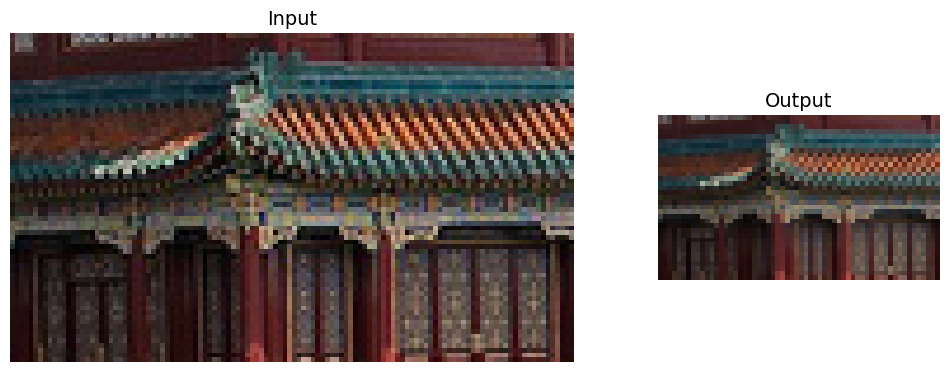

In [ ]:
# Define an AveragePooling2D layer with a pool size of 2x2
avg_pool = keras.layers.AvgPool2D(pool_size=2)

# Apply average pooling to the input tensor
output_avg = avg_pool(cropped_images)

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])
# Plot the input image in the first subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
# Plot the output image after average pooling in the second subplot
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
# Display the plot
plt.show()


## Global Average Pooling
The global average pooling layer computes the average value of each feature map across its entire spatial dimensions. This means it condenses each feature map into a single number for each instance in the input data. Despite discarding a lot of information, it's useful as an output layer in some cases. You can add it to a neural network model using Keras `GlobalAvgPool2D` class.

In [ ]:
# Define a GlobalAveragePooling2D layer
global_avg_pool = keras.layers.GlobalAvgPool2D()

# Apply global average pooling to the input tensor
global_avg_pool(cropped_images)

# Define a Lambda layer to compute the global average pooling manually
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

# Apply the Lambda layer to compute global average pooling
output_global_avg2(cropped_images)


# `CNN Architectures`

- In a typical Convolutional Neural Network (CNN) architecture, we often see a series of convolutional layers followed by ReLU activation functions to capture various features in an image. Then, pooling layers are employed to reduce the spatial dimensions while preserving important features. This process is repeated multiple times to create a hierarchy of features. Once the spatial dimensions are reduced, fully connected layers are added to process the flattened feature maps and make high-level decisions. Finally, an output layer, usually with a softmax activation function for classification tasks, produces the final prediction.

**Example:** Consider a simplified CNN architecture for image classification:

* **Input Layer:** Receives the raw pixel values of the image.
* **Convolutional Layers:** Detect features like edges, textures, and patterns using learnable filters.
* **ReLU Activation:** Introduces non-linearity after each convolutional layer.
* **Pooling Layers:** Reduce spatial dimensions, maintaining important features.
* **Flatten Layer:** Flattens the feature maps into a single vector.
* **Fully Connected Layers:** Process the flattened features, learning complex patterns.
* **Output Layer:** Produces the final prediction, often with softmax activation for multi-class classification.

$Input Image -> Conv2D -> ReLU -> MaxPooling -> Conv2D -> ReLU -> MaxPooling -> Flatten -> Dense -> Dense -> Output$


In [ ]:
'''
Input Image (32x32x3)  
    v
Conv2D (filters=32, kernel_size=(3,3))  
    v
ReLU Activation
    v
MaxPooling (2x2)
    v
Feature Maps (15x15x32)  
    v
Conv2D (filters=64, kernel_size=(3,3))  
    v
ReLU Activation
    v
MaxPooling (2x2)
    v
Feature Maps (6x6x64)
    v
Flatten
    v
Flattened Vector (2304) 
    v
Dense (units=128)
    v
ReLU Activation
    v
Dense (units=num_classes)
    v
Output (units=num_classes)

'''

### Addressing Fashion MNIST Using a Convolutional Neural Network

In [ ]:
# Load Fashion MNIST dataset and split into training, validation, and test sets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Normalize the input data
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Add a channel dimension to the input data
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Define a partial function for convolutional layers with default parameters
'''
A partial function, provided by the functools module in Python, allows you
 to fix a certain number of arguments of a function and generate a new function
 with those fixed arguments. In the context of defining neural network architectures,
 a partial function can be useful for creating layers with default parameters that you
 frequently use.
 '''
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

# Define the CNN architecture using the Sequential API
model = keras.models.Sequential([
    # Define the convolutional layers with default parameters using DefaultConv2D
    # followed by max pooling layers, and then flatten the output
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),  # 64 filters, 7x7 kernel
    keras.layers.MaxPooling2D(pool_size=2),  # Max pooling with a 2x2 pool size
    DefaultConv2D(filters=128),  # 128 filters
    DefaultConv2D(filters=128),  # 128 filters
    keras.layers.MaxPooling2D(pool_size=2),  # Max pooling with a 2x2 pool size
    DefaultConv2D(filters=256),  # 256 filters
    DefaultConv2D(filters=256),  # 256 filters
    keras.layers.MaxPooling2D(pool_size=2),  # Max pooling with a 2x2 pool size
    keras.layers.Flatten(),  # Flatten the output

    # Add fully connected layers with dropout for regularization
    keras.layers.Dense(units=128, activation='relu'),  # Dense layer with 128 units and ReLU activation
    keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    keras.layers.Dense(units=64, activation='relu'),   # Dense layer with 64 units and ReLU activation
    keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate

    # Output layer with softmax activation for classification
    keras.layers.Dense(units=10, activation='softmax'),  # Dense layer with 10 units (number of classes) and softmax activation
])

'''
 The number of filters in a CNN tends to increase towards the output layer. This makes sense because low-level 
 features are limited, but there are many ways to combine them into higher-level features. Doubling the number of 
 filters after each pooling layer is common. Since pooling layers reduce spatial dimensions by half, doubling the 
 filters doesn't dramatically increase parameters, memory usage, or computational load.
'''

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test)

# Make predictions on new data
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)


Epoch 1/10
1719/1719 [==============================] - 68s 39ms/step - loss: 0.7062 - accuracy: 0.7577 - val_loss: 0.3896 - val_accuracy: 0.8644
Epoch 2/10
1719/1719 [==============================] - 69s 40ms/step - loss: 0.4144 - accuracy: 0.8617 - val_loss: 0.3305 - val_accuracy: 0.8792
Epoch 3/10
1719/1719 [==============================] - 68s 39ms/step - loss: 0.3528 - accuracy: 0.8819 - val_loss: 0.3180 - val_accuracy: 0.8914
Epoch 4/10
1719/1719 [==============================] - 142s 83ms/step - loss: 0.3290 - accuracy: 0.8886 - val_loss: 0.2844 - val_accuracy: 0.8956
Epoch 5/10
1719/1719 [==============================] - 88s 51ms/step - loss: 0.2986 - accuracy: 0.8974 - val_loss: 0.2945 - val_accuracy: 0.9010
Epoch 6/10
1719/1719 [==============================] - 122s 71ms/step - loss: 0.2891 - accuracy: 0.9043 - val_loss: 0.2900 - val_accuracy: 0.9000
Epoch 7/10
1719/1719 [==============================] - 66s 38ms/step - loss: 0.2704 - accuracy: 0.9075 - val_loss: 0.2919

## Popular CNN architectures:

### 1. **LeNet-5** 

- Introduced in **1998** by **Yann LeCun**, this was one of the `first CNN architectures` and was primarily used for **handwritten digit recognition**.

    - **Unsual average pooling layers:** In the average pooling layers, each neuron not only computes the mean of its inputs but also applies extra operations. This includes multiplying the mean by a learnable coefficient and adding a learnable bias term, both specific to each feature map. Finally, an activation function is applied. These enhancements introduce additional learnable parameters per feature map, alongside the standard mean computation and activation function application.

    - **Unsual output layer:** In the output layer, neurons don't compute the usual matrix multiplication. Instead, they calculate the squared Euclidean distance between input and weight vectors to determine class alignment. The cross-entropy cost function is preferred for its stronger penalty on wrong predictions, aiding faster convergence.

- The website link: http://yann.lecun.com/exdb/lenet/index.html


### 2. **AlexNet** 
* Developed by **Alex Krizhevsky**, **Ilya Sutskever**, and Geoffrey Hinton in **2012**, AlexNet significantly outperformed previous methods on the ImageNet dataset, **winning** the **2012 ImageNet ILSVRC** competition.

    - AlexNet shares similarities with **LeNet-5** but is significantly **larger and deeper**. 
    
    - Notably, it was the pioneering model to directly **stack convolutional layers** on top of each other, **deviating** from the practice of placing a **pooling** layer on **top each convolutional** layer. 

    - **Local Response Normalization (LRN)**: AlexNet also uses a competitive normalization step immediately after the ReLU step, called local response normalization (LRN). 
    
        - This process enables the most active neurons to stop or reduce the activity of nearby neurons in other feature maps positioned at the same spot. This behavior mirrors what happens in real biological neurons.

        - This is beneficial because it encourages specialization among neurons and prevents any single neuron from dominating the entire network. By inhibiting the activity of neighboring neurons, the network can focus on a wider range of features and become more proficient at recognizing diverse patterns in the data and ultimately improving generalization.


    - The formula for LRN can be described as follows:

        $ b_{x,y}^{i} = a_{x,y}^{i} \left( k + \alpha \sum_{j=\max(0,i-\frac{n}{2})}^{\min(N-1,i+\frac{n}{2})} \left(a_{x,y}^{j}\right)^2 \right)^{-\beta} $

        - $a_{x,y}^{i} $ represents the activation of a neuron at position $(x, y)$ in the $i_{th}$ feature map before normalization.
        - $b_{x,y}^{i} $ represents the normalized activation.
        - $k$, $\alpha$, and $\beta$ are hyperparameters typically chosen through experimentation.
        - $N $ is the total number of feature maps.
        - $n $ is the size of the local region around each neuron over which normalization is performed.

    - This normalization helps to improve the network's ability to generalize by encouraging competition between neurons and ensuring that different feature maps do not become too similar.


### 3. **GoogLeNet (Inception)** 
* The GoogLeNet architecture, developed by **Christian Szegedy** and his team at **Google Research**, revolutionized the field of deep learning by **winning** the **ILSVRC 2014** challenge with a top-five error rate of less than 7%. 

- This significant achievement was due to the **network's depth**, which was much **greater** than that of previous Convolutional Neural Networks (CNNs). 

- The innovative use of `inception modules` allowed GoogLeNet to efficiently manage parameters, resulting in approximately 6 million parameters compared to AlexNet's 60 million.

* `Inception Module Architecture:` The inception module is a crucial component of GoogLeNet's architecture, enabling it to process features at **multiple scales** within the **same layer**. Here is a breakdown of how an inception module operates:

    * Multi-Scale Processing: The input is divided into four parallel paths:
        * 1×1 Convolution: This path captures **fine-grained** features and helps in dimensionality reduction.
        * 1×1 Convolution followed by 3×3 Convolution: This path captures **medium-sized** features.
        * 1×1 Convolution followed by 5×5 Convolution: This path captures **larger** features.
        * 3×3 Max Pooling followed by 1×1 Convolution: This path captures features using a pooling operation to maintain the spatial dimensions.

* `Depth Concatenation:` The outputs from the four parallel paths are concatenated along the **depth dimension**. In TensorFlow, this can be implemented using the `tf.concat()` function with `axis=3`, which stacks the feature maps from each path depth-wise. This design allows the network to efficiently capture various types of features, making it more robust and efficient compared to previous architectures.

* `Key Components and Roles of 1×1 Convolutional Layers`
    1. *Capturing Depth Patterns:*
        * 1×1 convolutional layers, despite looking at a single pixel spatially, are adept at capturing **patterns along the depth** (or *channel*) dimension. They allow the network to learn **cross-channel** interactions and dependencies, enriching the feature representation.

    2. *Dimensionality Reduction (Bottleneck Layers):*

        * These layers are configured to output fewer feature maps than their inputs, effectively reducing dimensionality.

    3. *Complex Pattern Detection:*

        * Pairs of convolutional layers (e.g., [1×1, 3×3] and [1×1, 5×5]) work together like a powerful convolutional layer. Instead of sweeping a simple linear classifier across the image, this pair of layers acts as a two-layer neural network, capable of capturing more complex patterns.

In [ ]:
'''                      Input
                           |
       +------------+------------+--------------+
       |            |            |              |            
    1x1 Conv     1x1 Conv     1x1 Conv       3x3 Max Pool  (All use stride 1 and same padding)
       |            |            |              |            
       |         3x3 Conv     5x5 Conv       1x1 Conv      (ReLU Activation for all)
       |            |            |              |            
       +------------+------------+--------------+
                           |
                      Concatenate
                           |
                        Output
'''

### 4. **VGGNet** 

* Proposed by the **Visual Geometry** Group at the University of **Oxford** in **2014**, VGGNet is characterized by its `simplicity` and `uniform` architecture. It consists of many convolutional layers, all with small 3x3 filters, stacked on top of each other.

* **Key Points:**

    * **Architecture Simplicity:** VGGNet's architecture was *straightforward*, comprising alternating convolutional and pooling layers, making it easy to understand and implement.

    * **Depth and Filter Usage:** Despite its simplicity, VGGNet achieved remarkable *performance* with its *deep network architecture*, employing a total of 16 or 19 layers with multiple 3 × 3 filters in each layer.

### 5. **ResNet (Residual Network)** 

* **Kaiming He et al**. **won ILSVRC 2015** with ResNet, a deep CNN of 152 layers. It achieved a top-five error rate under 3.6% by using skip connections to *address* the *vanishing gradient problem*, enabling efficient training of extremely deep networks.

* ResNet introduced the concept of `residual learning`, where shortcut connections (skip connections) are added to ease the training of deep networks. This architecture enabled the training of much deeper networks, surpassing previous state-of-the-art performance.

* `Residual learning` used in architectures like ResNets, adds skip connections that directly add the input to the output of deeper layers. This forces the network to learn *residual functions*, $f(x)=h(x)−x$, making it easier to train deep networks by focusing on learning the difference between the input and the target output.

    - When you start training a regular neural network, it begins with weights that are close to zero. So, initially, the network's output is also close to zero. But when you add a skip connection, the network begins by just copying its inputs to the outputs. This means it's essentially modeling the identity function: whatever comes in, just goes out.

    - Now, if the target function that the network is trying to learn is somewhat close to the identity function, it means that the desired output is similar to the input, with perhaps some minor modifications or adjustments. Instead of trying to learn complex patterns from scratch, it starts by learning the simpler task of just copying the inputs and then gradually learns more complex patterns. This makes training quicker and more efficient. In such cases training becomes more efficient because the network doesn't need to make significant changes to the input-output mapping—it just needs to fine-tune or adjust the inputs slightly to match the desired outputs.

    * When you add many skip connections to a network, it allows the network to start making progress even if some layers haven't started learning yet. This is because the skip connections provide shortcuts for the signal to easily propagate across the entire network.

    * In essence, a deep residual network can be visualized as a stack of `residual units (RUs)`. Each residual unit is like a small neural network with its own skip connection. These skip connections enable the signal to bypass certain layers and flow more freely through the network, aiding in the efficient training of deep models.

In [ ]:
'''
Input ----> Convolutional Layers ----> Output
  |_______________________________^
                   |
                Residual
               Connection

Input ----> Residual Unit 1 ----> Residual Unit 2 ----> ... ----> Residual Unit N ----> Output
         |__________________^  |__________________^            |__________________^                                                  
 
'''

### 6. Xception 

* Proposed by **François Chollet** in **2016**, *combines* the concepts of **GoogLeNet and ResNet**, outperforming Inception-v3 on large-scale vision tasks. 

* It replaces inception modules with `depthwise separable convolution` layers. 
    - They consist of two parts: the first part applies `spatial filters`(edges, corners, or textures) for each input feature map, and the second part focuses solely on `cross-channel patterns` (the combinations of colors) using 1x1 filters. This is achieved by breaking down the convolution operation into two separate operations:

        **1. Spatial Filtering:** In this step, each input feature map is convolved with a single spatial filter independently. This captures spatial patterns within each feature map.

        **2. Cross-Channel Filtering:** After spatial filtering, the resulting feature maps are convolved with 1x1 filters, which capture cross-channel patterns. These filters look for patterns across different channels of the feature maps. 

* Although Xception doesn't use inception modules like GoogLeNet, it's considered a variant because inception modules essentially have 1x1 filters for cross-channel patterns, while the layers on top are regular convolutional layers that consider both spatial and cross-channel patterns jointly. Thus, inception modules serve as an intermediate between regular and separable convolutional layers. Despite this, separable convolutional layers often outperform regular ones.

### 7. SENet

- The **Squeeze-and-Excitation Network** (**SENet**) emerged as the victor in the **ILSVRC 2017** challenge by achieving an impressive top-five error rate of 2.25%. 

- SENet **enhances** existing architectures like **inception** networks and **ResNets**, elevating their performance. 

- In SENet, each unit in the original architecture, whether it's an **inception** module or a **residual** unit, is augmented with a small neural network known as an `SE block`. Additionally, extended versions of inception networks and ResNets, called `SE-Inception` and `SE-ResNet`, respectively, further exemplify the efficacy of `SENet`.

- **Squeeze-and-Excitation block:** An SE block is like a smart analyzer that looks at the features produced by a neural network, but it only focuses on **how different features relate to each other**, not where they are in the image. It learns which features usually go together and then adjusts the features accordingly.

    - For example, let's say it learns that in pictures, mouths, noses, and eyes often appear together. So, if it sees a mouth and a nose but not much activity in the eye area, it knows something might be missing. It then boosts the activity related to eyes to make sure they're properly detected. This adjustment helps the network make better sense of the images, especially if some features were hard to recognize before.

    - An SE block consists of only three layers: 

        - A global average pooling layer

        - A hidden dense layer employing the ReLU activation function.

        - A dense output layer employing the sigmoid activation function.
        

    - The SE block **starts** with a **global average pooling** layer, which calculates the **mean activation** for each feature map. Then, in the **next layer**, this information is **condensed** into a much smaller vector representation, typically 16 times fewer dimensions than the number of feature maps. This compression forces the SE block to learn a compact representation of feature combinations. Finally, the **output layer** generates a **recalibration vector** containing one value for each feature map, **indicating** the **importance** of **each feature**. These recalibration scores are used to scale the feature maps, amplifying relevant features and suppressing irrelevant ones.

# `Creating a ResNet-34 CNN with Keras`

- **Creating a `ResidualUnit` layer:**

### Overview

- **Layers**: 34
- **Type**: Convolutional Neural Network (CNN)
- **Building Block**: Basic Residual Block

### Architecture Details

1. **Initial Layers**:
   - **Conv1**: 7x7 convolution, 64 filters, stride 2
      - Input: $(224 \times 224 \times 3$)
      - Output: $(112 \times 112 \times 64$)
   - **Batch Normalization**: On the output of Conv1
   - **ReLU Activation**
   - **Max Pooling**: 3x3 max pool, stride 2

2. **Residual Blocks**:
   - The network is divided into four main stages, each containing a sequence of residual blocks.
   - **Basic Residual Block Structure**:
     - Each block consists of two 3x3 convolutional layers.
     - Each convolution is followed by batch normalization and ReLU activation.
     - A shortcut connection adds the input of the block to the output after the second convolution.

3. **Stages**:

   - **Stage 1**:
     - 3 residual blocks, each with 64 filters.
     - No downsampling (stride 1).

   - **Stage 2**:
     - 4 residual blocks, each with 128 filters.
     - Downsampling occurs in the first block (stride 2).

   - **Stage 3**:
     - 6 residual blocks, each with 256 filters.
     - Downsampling occurs in the first block (stride 2).

   - **Stage 4**:
     - 3 residual blocks, each with 512 filters.
     - Downsampling occurs in the first block (stride 2).

4. **Final Layers**:
   - **Average Pooling**: Global average pooling to reduce each feature map to a single value.
   - **Fully Connected Layer**: 1000 neurons (for ImageNet classification).
   - **Softmax Activation**: Produces class probabilities.

### Detailed Layer Breakdown

1. **Conv1**:
   - Input: $(224 \times 224 \times 3$)
   - Output: $(112 \times 112 \times 64$)

2. **Max Pooling**:
   - Output: $(56 \times 56 \times 64$)

3. **Stage 1 (3 blocks)**:
   - Block 1: $(56 \times 56 \times 64$)
   - Block 2: $(56 \times 56 \times 64$)
   - Block 3: $(56 \times 56 \times 64$)

4. **Stage 2 (4 blocks)**:
   - Block 1: $(28 \times 28 \times 128$) (downsampled)
   - Block 2: $(28 \times 28 \times 128$)
   - Block 3: $(28 \times 28 \times 128$)
   - Block 4: $(28 \times 28 \times 128$)

5. **Stage 3 (6 blocks)**:
   - Block 1: $(14 \times 14 \times 256$) (downsampled)
   - Block 2: $(14 \times 14 \times 256$)
   - Block 3: $(14 \times 14 \times 256$)
   - Block 4: $(14 \times 14 \times 256$)
   - Block 5: $(14 \times 14 \times 256$)
   - Block 6: $(14 \times 14 \times 256$)

6. **Stage 4 (3 blocks)**:
   - Block 1: $(7 \times 7 \times 512$) (downsampled)
   - Block 2: $(7 \times 7 \times 512$)
   - Block 3: $(7 \times 7 \times 512$)

7. **Average Pooling**:
   - Output: $(1 \times 1 \times 512$)

8. **Fully Connected Layer**:
   - Output: 1000 classes

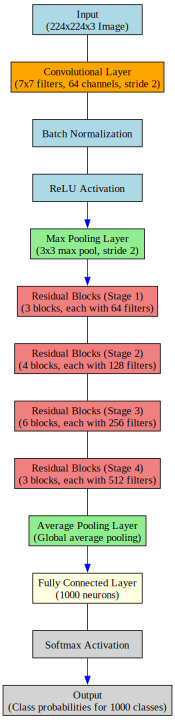

In [14]:
from IPython.display import display
import graphviz

# Define the architecture components and connections
components = [
    ("Input\n(224x224x3 Image)", "Convolutional Layer\n(7x7 filters, 64 channels, stride 2)"),
    ("Convolutional Layer\n(7x7 filters, 64 channels, stride 2)", "Batch Normalization"),
    ("Batch Normalization", "ReLU Activation"),
    ("ReLU Activation", "Max Pooling Layer\n(3x3 max pool, stride 2)"),
    ("Max Pooling Layer\n(3x3 max pool, stride 2)", "Residual Blocks (Stage 1)\n(3 blocks, each with 64 filters)"),
    ("Residual Blocks (Stage 1)\n(3 blocks, each with 64 filters)", "Residual Blocks (Stage 2)\n(4 blocks, each with 128 filters)"),
    ("Residual Blocks (Stage 2)\n(4 blocks, each with 128 filters)", "Residual Blocks (Stage 3)\n(6 blocks, each with 256 filters)"),
    ("Residual Blocks (Stage 3)\n(6 blocks, each with 256 filters)", "Residual Blocks (Stage 4)\n(3 blocks, each with 512 filters)"),
    ("Residual Blocks (Stage 4)\n(3 blocks, each with 512 filters)", "Average Pooling Layer\n(Global average pooling)"),
    ("Average Pooling Layer\n(Global average pooling)", "Fully Connected Layer\n(1000 neurons)"),
    ("Fully Connected Layer\n(1000 neurons)", "Softmax Activation"),
    ("Softmax Activation", "Output\n(Class probabilities for 1000 classes)")
]

# Create a Digraph object
dot = graphviz.Digraph()

# Add nodes and edges with categorized colors
for src, dst in components:
    # Categorize blocks and assign colors
    color = 'lightblue'  # default color
    if 'Convolutional' in src:
        color = 'orange'
    elif 'Pooling' in src:
        color = 'lightgreen'
    elif 'Residual' in src:
        color = 'lightcoral'
    elif 'Fully Connected' in src:
        color = 'lightyellow'
    elif 'Output' in dst:
        color = 'lightgrey'

    dot.node(src, shape='rectangle', style='filled', fillcolor=color, fontsize='14', width='2')
    dot.node(dst, shape='rectangle', style='filled', fillcolor=color, fontsize='14', width='2')
    if 'Pooling' in src or 'Activation' in src:
        dot.edge(src, dst, fontsize='12', color='blue')
    else:
        dot.edge(src, dst, fontsize='12', color='black', dir='none')

# Set graph properties
dot.attr(rankdir='TB', size='10')

# Display the graph directly in Jupyter Notebook
display(dot)


In [ ]:
# Define a custom function DefaultConv2D using partial from the functools module.
# It partially initializes the keras.layers.Conv2D function with predefined arguments.
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1, padding="SAME", use_bias=False)

# Define a class named ResidualUnit, inheriting from keras.layers.Layer.
class ResidualUnit(keras.layers.Layer):

    # Constructor method for ResidualUnit class.
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)  # Call constructor of the superclass with additional keyword arguments.

        # Assign the activation function specified in the constructor to self.activation.
        self.activation = keras.activations.get(activation)

        # Initialize main_layers with a sequence of layers for the main path of the residual unit.
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),  # Convolutional layer with specified filters and strides.
            keras.layers.BatchNormalization(),        # Batch normalization layer.
            self.activation,                          # Activation function.
            DefaultConv2D(filters),                   # Convolutional layer with specified filters.
            keras.layers.BatchNormalization()         # Batch normalization layer.
        ]

        '''
        In Residual Networks (ResNets), skip connections are used to add the input of a layer
        to its output, helping to mitigate the vanishing gradient problem and allowing the 
        network to train deeper models. 
        '''
        # Initialize an empty list for the skip connection path.
        self.skip_layers = []

        '''
        If the stride is greater than 1, the output dimensions differ from the input, 
        complicating skip connections. Thus, self.skip_layers is populated with a 1x1 
        convolutional layer and batch normalization to match the dimensions and filters
        of the main path output.
        '''
        # If strides is greater than 1, initialize skip_layers with a sequence of layers for the skip connection path.
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),  # 1x1 convolutional layer with specified filters and strides.
                keras.layers.BatchNormalization()                        # Batch normalization layer.
            ]

    # Define the call method, specifying how the layers are applied to inputs during forward propagation.
    def call(self, inputs):
        Z = inputs  # Initialize Z with the input tensor.

        # Apply each layer in main_layers sequentially to the input tensor Z.
        for layer in self.main_layers:
            Z = layer(Z)

        skip_Z = inputs  # Initialize skip_Z with the input tensor for the skip connection.

        # Apply each layer in skip_layers sequentially to the input tensor skip_Z.
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)

        # Return the element-wise addition of Z and skip_Z, followed by the activation function.
        # This represents the output of the residual unit.
        return self.activation(Z + skip_Z)


In [ ]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()